In [27]:
import pandas as pd
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

import pickle


In [4]:
dataset=pd.read_csv('../Data/train.csv')
dataset.head()

,Category,Message
0,ham,Heehee that was so funny tho
1,ham,I don wake since. I checked that stuff and saw...
2,ham,Dai what this da.. Can i send my resume to thi...
3,ham,U too...
4,ham,Didn't you get hep b immunisation in nigeria.


In [5]:
def clean_text(text):
    words_to_remove = set(stopwords.words('english'))
    text = text.lower()
    # Remove punctuation but keep !, $, @, ? since they exist more in spams than hams as in EDA notebook
    text = re.sub(r"[^\w\s!$@?]", "", text)  
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in words_to_remove]
    text = ' '.join(text)
    return text

In [6]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [7]:
text = "This is an example of text processing using NLTK."
cleaned_text = clean_text(text)
print("before:", text)
print("after:", cleaned_text)

before: This is an example of text processing using NLTK.
after: example text processing using nltk


In [8]:
text = "you need to be able to process text data in order to do text classification."
cleaned_text = clean_text(text)
print("before:", text)
print("after:", cleaned_text)

before: you need to be able to process text data in order to do text classification.
after: need able process text data order text classification


In [9]:
text = "lets check some words like corpora and rocks using NLTK."
cleaned_text = lemmatize_text(text)
print("before:", text)
print("after:", cleaned_text)

before: lets check some words like corpora and rocks using NLTK.
after: let check some word like corpus and rock using NLTK .


In [10]:
dataset['cleaned_text'] = dataset['Message'].apply(clean_text)
dataset['cleaned_text'] = dataset['cleaned_text'].apply(lemmatize_text)
dataset.head()


,Category,Message,cleaned_text
0,ham,Heehee that was so funny tho,heehee funny tho
1,ham,I don wake since. I checked that stuff and saw...,wake since checked stuff saw true available sp...
2,ham,Dai what this da.. Can i send my resume to thi...,dai da send resume id
3,ham,U too...,u
4,ham,Didn't you get hep b immunisation in nigeria.,didnt get hep b immunisation nigeria


In [11]:
dataset.iloc[10]['Message']

'Maybe westshore or hyde park village, the place near my house?'

In [12]:
dataset.iloc[10]['cleaned_text']

'maybe westshore hyde park village place near house ?'

In [13]:
dataset.drop(['Message'], axis=1, inplace=True)

### Why Choose Count Vectorizer Over TF-IDF in Spam Detection?

Based on research findings and empirical comparisons between TF-IDF and Bag-of-Words (BOW) approaches, here’s why Count Vectorizer (BOW) might outperform TF-IDF in spam detection:

**Spam Signals and Keyword Repetition**
   - Spam messages often rely on specific keywords (e.g., "free," "win," "offer") that are repeated frequently to grab attention.
   - **Count Vectorizer** effectively captures these repetitions, preserving the frequency of such keywords as strong spam signals.
   - **TF-IDF**, on the other hand, may downweight these keywords if they appear frequently across many messages, reducing their importance in spam detection.

**Example:**  
In a spam message like *"Win a free iPhone! Free entry!"*, Count Vectorizer highlights the word *"free"* as a strong signal due to its high frequency. TF-IDF, however, might reduce the importance of *"free"* if it appears commonly in other messages (e.g., non-spam emails).

In [14]:
Count_Vectorizer=CountVectorizer()
X_Count=Count_Vectorizer.fit_transform(dataset['cleaned_text'])
X_Count.shape

(5014, 8326)

In [15]:
y=dataset['Category'].replace({'ham':0, 'spam':1})

C:\Users\Karim Mahmoud\AppData\Local\Temp\ipykernel_23860\1518397032.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=dataset['Category'].replace({'ham':0, 'spam':1})


In [16]:
y.value_counts()

Category
0    4342
1     672
Name: count, dtype: int64

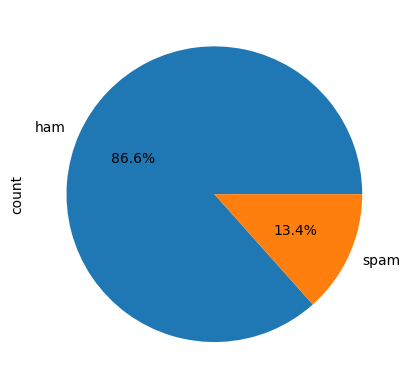

In [17]:
fig, ax = plt.subplots()
dataset['Category'].value_counts().plot(ax=ax, kind='pie', autopct='%1.1f%%')
plt.show()

It appears that the dataset in this notebook exhibits a class imbalance. However, we will proceed with the analysis without applying over- or undersampling techniques.the goal now is to optimize the model's performance on the existing data and evaluate its effectiveness using the F1 score as the primary metric.

In [18]:
X_train_Count, X_cv_Count, y_train_Count, y_cv_Count =  train_test_split(X_Count, y, test_size=0.1,stratify=y, random_state=42)

In [19]:
def showscore(yhat,y_acutal):
    print(f'recall score: {recall_score(y_acutal,yhat)}')
    print(f'precision score: {precision_score(y_acutal,yhat)}')
    print(f'f1 score: {f1_score(y_acutal,yhat)}')
    print(f'confusion_matrix: {confusion_matrix(y_acutal,yhat)}')    

In [20]:
svm = SVC(class_weight='balanced')
svm.fit(X_train_Count, y_train_Count)
y_pred = svm.predict(X_cv_Count)
showscore(y_cv_Count, y_pred)

recall score: 1.0
precision score: 0.7910447761194029
f1 score: 0.8833333333333333
confusion_matrix: [[435  14]
 [  0  53]]


In [21]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_Count, y_train_Count)
y_pred = naive_bayes.predict(X_cv_Count)
showscore(y_cv_Count, y_pred)

recall score: 0.927536231884058
precision score: 0.9552238805970149
f1 score: 0.9411764705882353
confusion_matrix: [[430   3]
 [  5  64]]


### Model Performance and Next Steps

The initial analysis indicates that the Naive Bayes model performs well on the dataset. To further enhance the model's performance, we will focus on **feature engineering**. By leveraging insights from the Exploratory Data Analysis (EDA), we will extract and create new features that could potentially improve the model's predictive capabilities. This approach aims to refine the model and achieve better results.

In [22]:
dataset['total_number'] = dataset['cleaned_text'].apply(lambda x: len(re.findall(r'\d+', x)))
dataset['len'] = dataset['cleaned_text'].apply(lambda x: len(x))

X_countvectorized = pd.DataFrame(X_Count.toarray(), columns=Count_Vectorizer.get_feature_names_out())
X = pd.concat([dataset[['total_number', 'len']].reset_index(drop=True), X_countvectorized], axis=1)

In [23]:
X_train, X_cv, y_train, y_cv =  train_test_split(X, y, test_size=0.1,stratify=y, random_state=42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],  
    'fit_prior': [True, False]
}

nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_cv)
showscore(y_cv, y_pred)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
recall score: 1.0
precision score: 0.9104477611940298
f1 score: 0.953125
confusion_matrix: [[435   6]
 [  0  61]]
Best Parameters: {'alpha': 1, 'fit_prior': True}


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  
}

svm = SVC(class_weight='balanced')

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', n_jobs=8, verbose=2)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_cv)
showscore(y_cv, y_pred)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
recall score: 0.9682539682539683
precision score: 0.9104477611940298
f1 score: 0.9384615384615385
confusion_matrix: [[433   6]
 [  2  61]]
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [84]:
import xgboost as xgb

model = xgb.XGBClassifier(
    scale_pos_weight=(0.87 / 0.13),  
    eval_metric='aucpr'  # Optimize for precision-recall
)
model.fit(X_train, y_train)
y_pred = model.predict(X_cv)
showscore(y_cv, y_pred)

recall score: 0.9836065573770492
precision score: 0.8955223880597015
f1 score: 0.9375
confusion_matrix: [[434   7]
 [  1  60]]


The Naive bayes model performance has shown improvement, with the F1 score increasing from **94.1** to **95.3**. This enhancement reflects the effectiveness of the adjustments made during the modeling process. 

## models extraction

In [28]:
with open('../Models/model.pkl', 'wb') as file:
    pickle.dump(best_nb, file)

In [29]:
with open('../Models/vectorizer.pkl', 'wb') as file:
    pickle.dump(Count_Vectorizer, file)